<a href="https://colab.research.google.com/github/jktluna/WasteReduxImageClassification/blob/main/CopyOfImageClassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [2]:
!pip install tensorflow-model-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 3.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import layers

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
folder_path = '/content/drive/MyDrive/path/ColabNotebooks'

In [10]:
data_train_path = '/content/drive/MyDrive/ColabNotebooks/basedata/train'
data_val_path = '/content/drive/MyDrive/ColabNotebooks/basedata/validation'
data_test_path = '/content/drive/MyDrive/ColabNotebooks/basedata/test'

In [11]:
img_width = 180
img_height = 180

In [ ]:
#RENAMING AND REPLACING ALL FILES WITH SPACE TO UNDERSCORE

#import os

#def rename_files_in_place(directory):
#    for subdir, dirs, files in os.walk(directory):
#        for file in files:
#            if " " in file:
#                old_path = os.path.join(subdir, file)
#                new_file = file.replace(" ", "_")
#                new_path = os.path.join(subdir, new_file)
#                os.rename(old_path, new_path)
#                print(f"Renamed: {old_path} -> {new_path}")

#rename_files_in_place('/content/drive/MyDrive/ColabNotebooks/basedata/validation/')



Renamed: /content/drive/MyDrive/ColabNotebooks/basedata/validation/metal/metal 2561.jpg -> /content/drive/MyDrive/ColabNotebooks/basedata/validation/metal/metal_2561.jpg
Renamed: /content/drive/MyDrive/ColabNotebooks/basedata/validation/metal/metal 2555.jpg -> /content/drive/MyDrive/ColabNotebooks/basedata/validation/metal/metal_2555.jpg
Renamed: /content/drive/MyDrive/ColabNotebooks/basedata/validation/metal/metal 2564.jpg -> /content/drive/MyDrive/ColabNotebooks/basedata/validation/metal/metal_2564.jpg
Renamed: /content/drive/MyDrive/ColabNotebooks/basedata/validation/metal/metal 2556.jpg -> /content/drive/MyDrive/ColabNotebooks/basedata/validation/metal/metal_2556.jpg
Renamed: /content/drive/MyDrive/ColabNotebooks/basedata/validation/metal/metal 2569.jpg -> /content/drive/MyDrive/ColabNotebooks/basedata/validation/metal/metal_2569.jpg
Renamed: /content/drive/MyDrive/ColabNotebooks/basedata/validation/metal/metal 2573.jpg -> /content/drive/MyDrive/ColabNotebooks/basedata/validation/m

In [ ]:
#CHECKS UNSUPPORTED FILE
import imghdr
import os

def validate_images(directory, supported_formats=['jpeg', 'png', 'gif', 'bmp']):
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                img_type = imghdr.what(filepath)
                if img_type not in supported_formats:
                    print(f"Unsupported file format: {filepath} ({img_type})")
            except Exception as e:
                print(f"Error reading {filepath}: {e}")

# Call the function to validate your dataset directories
validate_images(data_train_path)

In [ ]:
#from PIL import Image

#try:
#    img = Image.open("/content/drive/MyDrive/ColabNotebooks/basedata/train/glass/glass_966.jpg")
#    img.verify()  # Verify that it can be opened as an image
#    print("The file is a valid image.")
#except Exception as e:
#    print(f"Error: {e}")


The file is a valid image.


In [ ]:
# THIS IS ONLY FOR NORMALIZATION WAG MO RUN PAG DI KA MAGNONORMALIZE
# IN THIS MODEL CASE PLEASE DON'T RUN
#def preprocess_image(image, label):
#    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
 #   image = image / 255.0  # Rescale to [0, 1]
  #  return image, label

In [16]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)


Found 5149 files belonging to 4 classes.


In [13]:
data_cat = data_train.class_names
# data_train = data_train.map(preprocess_image)  # Apply normalization #UNCOMMENT MO IF GUSTO MO MAG NORMALIZE

In [14]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False
)
# data_val = data_val.map(preprocess_image)  # Apply normalization #UNCOMMENT MO IF GUSTO MO MAG NORMALIZE

Found 5138 files belonging to 4 classes.


In [15]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False
)
# data_test = data_test.map(preprocess_image)  # Apply normalization #UNCOMMENT MO IF GUSTO MO MAG NORMALIZE

Found 5138 files belonging to 4 classes.


In [17]:
#Normalize the datasets
def preprocess_image(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)  # Normalize to [0, 1]
    return image, label

In [18]:
data_train = data_train.map(preprocess_image)
data_val = data_val.map(preprocess_image)
data_test = data_test.map(preprocess_image)

In [19]:
#Optional: Prefetch data for faster I/O
AUTOTUNE = tf.data.AUTOTUNE
data_train = data_train.prefetch(buffer_size=AUTOTUNE)
data_val = data_val.prefetch(buffer_size=AUTOTUNE)
data_test = data_test.prefetch(buffer_size=AUTOTUNE)

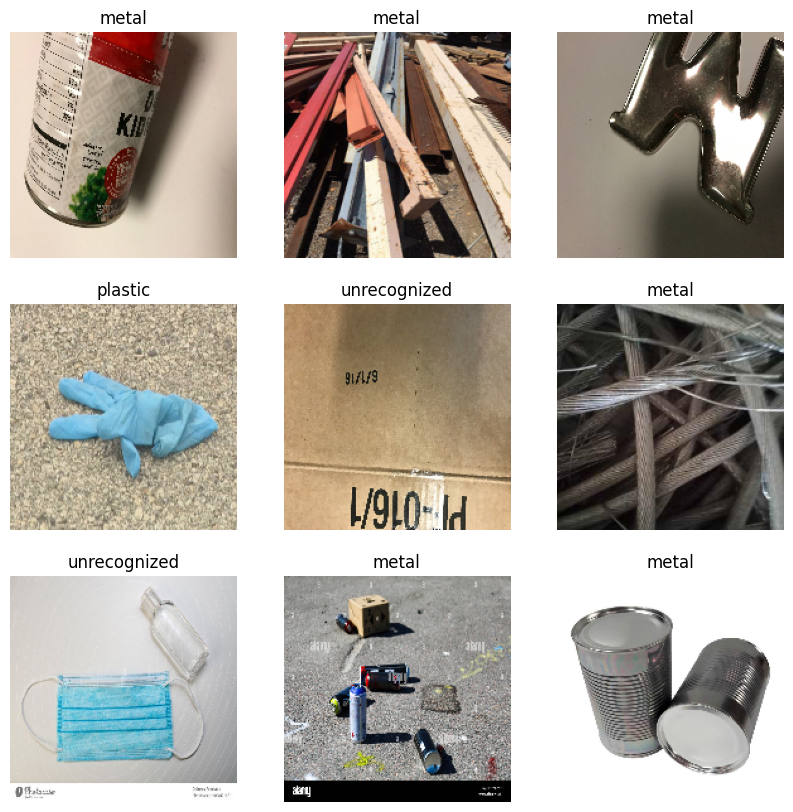

In [20]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        displayed_image = (image[i].numpy()).astype('uint8')  # MULTIPLY THE .NUMPY() TO 255.0
        plt.imshow(displayed_image)
        plt.title(data_cat[labels[i]])
        plt.axis('off')
plt.show()

In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.layers import Input

from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness

In [22]:
# I PERSONALLY ADD THIS DATA AUGMENTATION
#from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
#data_augmentation = Sequential([
 #   RandomFlip("horizontal"),
  #  RandomRotation(0.2),
   # RandomZoom(0.1),
#])

data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.1),
    RandomContrast(0.1),
    RandomBrightness(0.1),
    #Rescaling(1./255)  # Normalize images to the range [0, 1]
])

In [23]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
# base_model.trainable = True
fine_tune_at = 50  # Unfreeze layers after 50
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    data_augmentation, # ADD THE DATA AUGMENTATION BEFORE THE PRE-TRAINED MODEL
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(len(data_cat), activation='softmax')  # Assuming a multi-class classification task
])

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# I ALSO CHANGED THIS, BUT I DON'T KNOW IF THERE'S CHANGES IN ITS PERFORMANCE

In [26]:
epochs_size = 30 # I INCREASED THE TRAINING SIZE
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/30
 13/161 ━━━━━━━━━━━━━━━━━━━━ 46:11 19s/step - accuracy: 0.3123 - loss: 1.4873

KeyboardInterrupt: 

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

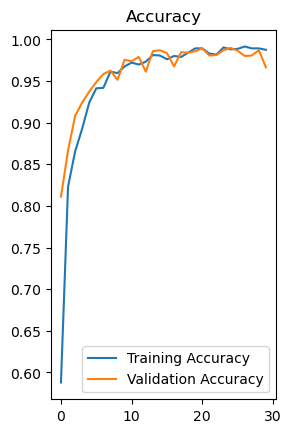

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

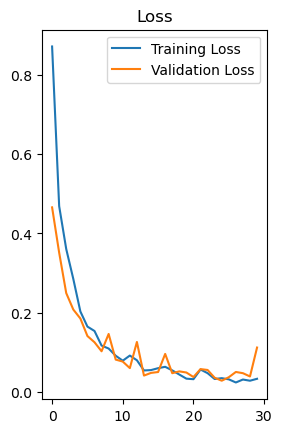

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:

image_path = r'C:\Users\Russuel\JN\basedata\basedata\test\metal\metal103.jpg'
image = tf.keras.utils.load_img(image_path, target_size=(img_height,img_width))
image_array = tf.keras.utils.img_to_array(image)
random_angle = np.random.uniform(-np.pi / 12, np.pi / 12)
rotated_image = tf.image.rot90(image_array, k=int(random_angle // (np.pi / 2)))
flipped_image = tf.image.random_flip_left_right(rotated_image)

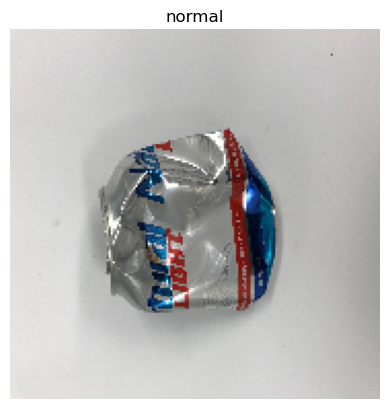

In [ ]:
plt.imshow(image_array.astype("uint8")) # predicting modified image
# plt.imshow(image_array.numpy().astype("uint8"))  # predicting modified image
plt.title('normal')
plt.axis('off')
plt.show()

In [ ]:
# normalized = image_array / 255.0
img_bat = tf.expand_dims(image_array, 0)
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)

1/1 [==============================] - 0s 39ms/step


Trash in Image is metal with ACCURACY of 57.61%


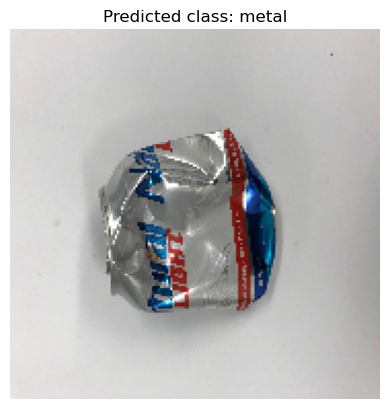

In [ ]:
print('Trash in Image is {} with ACCURACY of {:0.2f}%'.format(data_cat[np.argmax(score)], np.max(score)*100))

plt.figure(dpi=100)
plt.imshow(image_array.astype("uint8"))  # predicting non-modified image
# plt.imshow(rotated_image.numpy().astype("uint8"))  # predicting modified image
plt.title(f"Predicted class: {data_cat[np.argmax(score)]}")
plt.axis('off')
plt.show()

In [ ]:
import tensorflow_model_optimization as tfmot
print(tfmot.__file__)

C:\Users\Russuel\anaconda3\envs\gwithgpu\lib\site-packages\tensorflow_model_optimization\__init__.py


# **SAVE MODEL**

In [ ]:
model.save('./saved_model')

INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets


In [ ]:
import tensorflow as tf

model = tf.saved_model.load("./saved_model")

# Re-save the model in a format compatible with tfjs-node
tf.saved_model.save(model, "./savedModel")


INFO:tensorflow:Assets written to: ./savedModel\assets


INFO:tensorflow:Assets written to: ./savedModel\assets
